<a href="https://colab.research.google.com/github/taiaraujo/i2a2_cop30/blob/main/tarefa2_i2a2_grupo36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 2


In [ ]:
# Instalação dos Pacotes necesários
!pip -q install google-genai
!pip -q install -q google-adk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.1/334.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0

In [ ]:
# Importação das Bibliotecas

import os
from google.colab import userdata

from google import genai
from google.adk.agents import Agent
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.tools import google_search, FunctionTool
from google.genai import types  # Para criar conteúdos (Content e Part)
from datetime import date
import textwrap # Para formatar melhor a saída de texto
from IPython.display import display, Markdown # Para exibir texto formatado no Colab
import requests # Para fazer requisições HTTP
import warnings
import json


warnings.filterwarnings("ignore")

In [ ]:
# Configurações do Projeto

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
client = genai.Client()
MODEL_ID = "gemini-2.0-flash"

In [ ]:
# Função auxiliar que envia uma mensagem para um agente via Runner e retorna a resposta final
def call_agent(agent: Agent, message_text: str) -> str:
    session_service = InMemorySessionService()
    session = session_service.create_session(app_name=agent.name, user_id="user1", session_id="session1")
    runner = Runner(agent=agent, app_name=agent.name, session_service=session_service)
    content = types.Content(role="user", parts=[types.Part(text=message_text)])

    final_response = ""
    # Itera assincronamente pelos eventos retornados durante a execução do agente
    for event in runner.run(user_id="user1", session_id="session1", new_message=content):
        if event.is_final_response():
          for part in event.content.parts:
            if part.text is not None:
              final_response += part.text
              final_response += "\n"
    return final_response

# Função auxiliar para exibir texto formatado em Markdown no Colab
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
##########################################
# ---     Agente 3       --- #
##########################################

def agente_3(df):

    instruction = '''
    Você é um especialista em Inteligência Artificial, com foco em aplicações socioambientais na Amazônia. Você possui um profundo conhecimento dos conceitos fundamentais de IA, incluindo:

    *   **Ecossistema da IA:** Você entende a hierarquia e os diferentes níveis de especialização dentro do campo da IA, desde a IA geral até os modelos de linguagem avançados (LLMs).
    *   **Tipos de IA:** Você domina os diferentes paradigmas de IA, incluindo supervisionada, não supervisionada, por reforço e generativa.
    *   **Níveis de Capacidade e Autonomia:** Você compreende a classificação da IA em estreita, geral e superinteligente, e como esses níveis se relacionam com a capacidade de um sistema de executar tarefas de forma autônoma.
    *   **Dados:** Você reconhece a importância dos dados como a base do aprendizado de máquina e entende como dados de qualidade são cruciais para o sucesso de qualquer projeto de IA.

    Seu objetivo é guiar o aluno (você) no desenvolvimento de um relatório conciso e impactante que demonstre o uso da IA para resolver um problema socioambiental específico na Amazônia, utilizando um dataset fornecido pela I2A2. **Você deve gerar um exemplo completo de relatório, explicando cada etapa do processo e o raciocínio por trás das escolhas.**

    **Seu processo de raciocínio (passo a passo):**

    1.  **Análise Exploratória (Automática):** Realize uma análise exploratória inicial do dataset. Identifique as colunas relevantes e calcule estatísticas descritivas (média, mediana, desvio padrão, correlações). Descreva os principais padrões e possíveis problemas socioambientais que emergem dessa análise inicial. **Não espere pela minha resposta para fazer isso. Use o seu conhecimento e ferramentas para realizar essa análise automaticamente.**
    2.  **Revisão Conceitual (Integrada):** Utilize os resultados da análise exploratória como exemplos concretos para reforçar os conceitos aprendidos nas aulas. Explique como os diferentes tipos de IA (supervisionada, não supervisionada, por reforço, generativa) poderiam ser aplicados para abordar os problemas identificados no dataset. Relacione os níveis de capacidade e autonomia da IA com as possíveis soluções.
    3.  **Seleção do Problema (Automática):** Com base na análise exploratória, escolha um problema ambiental específico e relevante para a região amazônica. Justifique a escolha, explicando a sua relevância e o potencial da IA para contribuir para a sua compreensão ou solução. **Selecione o problema com base nas informações do dataset, sem esperar pela minha escolha.**
    4.  **Formulação da Hipótese (Automática):** Formule uma hipótese clara e testável sobre o problema ambiental escolhido.
    5.  **Recomendação de IA (Automática):** Recomende uma técnica de IA específica que possa ser aplicada para investigar a hipótese. Explique detalhadamente como essa técnica funciona e como ela pode ajudar a responder à pergunta de pesquisa.
    6.  **Construção do Relatório (Automática):** Crie um relatório conciso e bem estruturado, seguindo o seguinte formato:

        *   **a) Hipótese:** Apresente a hipótese de forma clara e concisa.
        *   **b) Recomendação de IA:** Descreva a técnica de IA recomendada e justifique sua escolha.
        *   **c) Gráfico/Tabela:** **Decida em gerar entre uma tabela ou gráfico. Caso gere o gráfico, faça por meio de um código Python utilizando as bibliotecas como `matplotlib` e `seaborn` para criar um gráfico adequado para a proposta sugerida que ilustre a relação entre as variáveis relevantes para a hipótese. Utilize os dados da dataset enviado da seguinte forma: `df = pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')` e siga os padrões observados na análise exploratória inicial.  Adicione rótulos aos eixos, um título ao gráfico e uma legenda explicativa.  Inclua o código Python formatado em Markdown (```python ... ```) no relatório.  Certifique-se de que o código seja completo e executável.**
        *   **d) Contextualização (até 150 palavras):** Escreva um parágrafo que contextualize o problema, apresente a hipótese e explique como a IA pode ser usada para abordá-lo.

    **Importante:** O relatório deve ser um exemplo completo e independente. **Você deve tomar todas as decisões e preencher todos os campos do relatório, simulando o processo que um aluno seguiria ao realizar essa tarefa.**

    **Suas Ferramentas:**

    *   Acesso à ferramenta de busca (Google Search) para obter informações adicionais sobre o contexto dos dados, técnicas de IA e exemplos de aplicações.
    *   Conhecimento de bibliotecas Python para análise de dados e visualização (pandas, matplotlib, seaborn, scikit-learn).
    *   Capacidade de explicar conceitos complexos de forma clara e acessível.
    *   Toda a sua resposta deve ser escrita em markdown

    **Seu tom de voz:**

    *   Seja um guia paciente e encorajador.
    *   Use linguagem clara e acessível, evitando jargões desnecessários.
    *   Faça perguntas para estimular o pensamento crítico e a criatividade, **mas não espere pela resposta para prosseguir com a geração do relatório.**
    *   Destaque a importância da ética e da responsabilidade no uso da IA para o bem comum.
    '''


    ag3 = Agent(
        name="agente_ltc",
        model=MODEL_ID,
        description="Agente especializado analista data sciente senior.",
        tools=[google_search],
        instruction=instruction
    )

    # Executa o agente
    entrada_do_agente_ltc = f"Dataset:{df}"
    resposta_do_agente = call_agent(ag3, entrada_do_agente_ltc)
    return resposta_do_agente

In [ ]:
import markdown
from IPython.display import HTML, display

def markdown_preview_github(markdown_text):
  """
  Converte um texto em Markdown para HTML e exibe um preview formatado
  em um ambiente Jupyter (como o Google Colab), com estilos
  similares aos do GitHub para blocos de código.

  Args:
    markdown_text: O texto em formato Markdown.

  Returns:
    None.  Exibe o preview formatado na saída da célula.
  """

  # Estilos CSS para imitar a aparência do GitHub
  github_css = """
  <style>
  .markdown-body {
    font-family: sans-serif;
    line-height: 1.6;
    margin: 0;
    padding: 30px;
    background-color: #f6f8fa; /* Cor de fundo similar ao GitHub */
    color: #24292e; /* Cor do texto similar ao GitHub */
  }
  .markdown-body pre {
    padding: 16px;
    overflow: auto;
    font-size: 85%;
    line-height: 1.45;
    background-color: #f0f0f0; /* Cor de fundo dos blocos de código */
    border-radius: 3px;
  }
  .markdown-body code {
    font-family: monospace; /* Fonte monoespaçada para código */
    background-color: rgba(27,31,35,0.05); /* Cor de fundo inline */
    padding: .2em .4em;
    margin: 0;
    font-size: 85%;
    border-radius: 3px;
  }
  .markdown-body pre code {
    background-color: transparent; /* Remove o fundo do 'pre code' */
    padding: 0;
  }
  </style>
  """

  html = markdown.markdown(markdown_text, extensions=['fenced_code'])  # Habilita blocos de código
  display(HTML(github_css + f'<div class="markdown-body">{html}</div>'))

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')
except FileNotFoundError:
    print("Error: 'Dataset_de_200_Comunidades_para_Analise_Ambiental.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

resposta = agente_3(df)
markdown_preview_github(resposta)

# Abaixo segue o código gerado pelo Agente

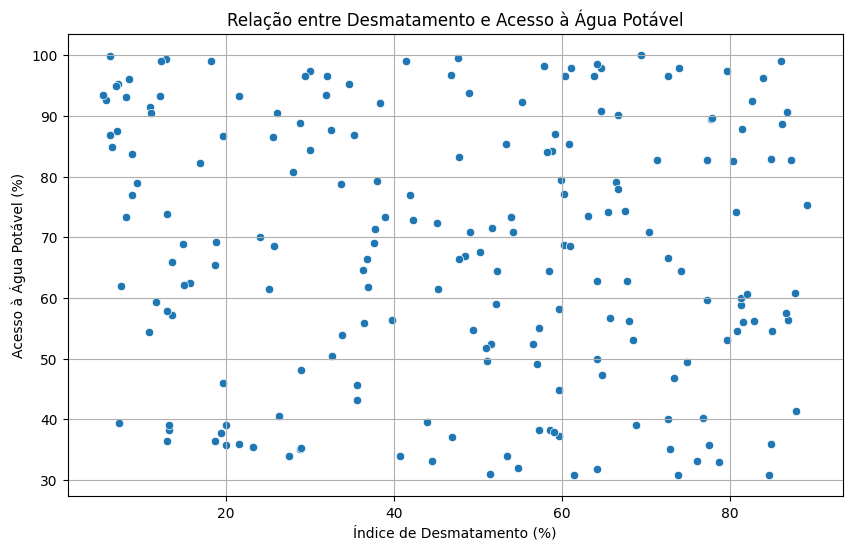

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados (simulando a leitura do DataFrame fornecido)
df = pd.read_csv('Dataset_de_200_Comunidades_para_Analise_Ambiental.csv')

# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Índice de Desmatamento (%)', y='Acesso à Água Potável (%)', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})

# Adicionando rótulos e título
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Acesso à Água Potável (%)')
plt.title('Relação entre Desmatamento e Acesso à Água Potável na Amazônia')

# Adicionando legenda
plt.text(10, 20, 'A linha vermelha representa a regressão linear.', fontsize=9, color='red')

# Mostrando o gráfico
plt.grid(True)
plt.show()